# Análisis de datos exploratorio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

##  Explorando el data set postulante_educacion... 

In [2]:
postulantes_educacion = pd.read_csv('data/FiubaDesde15Abril/fiuba_1_postulantes_educacion.csv')
columns_rename = {'idpostulante': 'Id postulante', 'nombre': 'Formacion', 'estado': 'Estado formacion'}
postulantes_educacion = postulantes_educacion.rename(columns=columns_rename)
postulantes_educacion.head(10)

,Id postulante,Formacion,Estado formacion
0,YZP,Master,En Curso
1,ZjlZ,Master,En Curso
2,aEW8J,Universitario,En Curso
3,8QGRj,Universitario,En Curso
4,eRYl5r,Universitario,En Curso
5,1lKNa3,Universitario,En Curso
6,NA84GJ,Universitario,En Curso
7,a61Yo5,Universitario,En Curso
8,ZjdkqZ,Universitario,En Curso
9,8wKOpM,Universitario,En Curso


In [15]:
postulantes_nivel_educativo = pd.read_csv('data/FiubaHasta15Abril/fiuba_1_postulantes_educacion.csv')
columns_rename = {'idpostulante': 'id_postulante', 'nombre': 'formacion_postulante', 'estado': 'estado_formacion_postulante'}
postulantes_nivel_educativo.rename(columns=columns_rename)

,id_postulante,formacion_postulante,estado_formacion_postulante
0,ZjlZ,Master,En Curso
1,NdJl,Posgrado,En Curso
2,5kNq,Otro,En Curso
3,8rYD,Master,En Curso
4,1Wvj,Universitario,En Curso
5,ZPWlE,Universitario,En Curso
6,e4VXj,Master,En Curso
7,aEW8J,Universitario,En Curso
8,8QGRj,Universitario,En Curso
9,e8bQ8,Universitario,En Curso


In [13]:
d1 = pd.read_csv('data/FiubaDesde15Abril/fiuba_1_postulantes_educacion.csv')
d1.shape

(397509, 3)

In [12]:
d2 = pd.read_csv('data/FiubaHasta15Abril/fiuba_1_postulantes_educacion.csv')
d2.shape

(407453, 3)

In [11]:
d0 = pd.read_csv('data/fiuba_1_postulantes_educacion.csv')
d0.shape

(298231, 3)

In [9]:
ftn={'Secundario' : 10, 'Otro': 20, 'Terciario/Técnico' : 30, 'Universitario' : 40, 'Posgrado' : 50,
       'Master' : 50, 'Doctorado' : 50}
postulantes_educacion['Formacion_n']=postulantes_educacion['Formacion'].map(ftn);
postulantes_educacion.head()

,Id postulante,Formacion,Estado formacion,Formacion_n
0,YZP,Master,En Curso,50
1,ZjlZ,Master,En Curso,50
2,aEW8J,Universitario,En Curso,40
3,8QGRj,Universitario,En Curso,40
4,eRYl5r,Universitario,En Curso,40


In [12]:
estado_to_n = {'En Curso': 4, 'Abandonado': 0, 'Graduado': 8}
postulantes_educacion['Estado formacion_n']=postulantes_educacion['Estado formacion'].map(estado_to_n)
postulantes_educacion['Nivel Educativo'] = postulantes_educacion['Estado formacion_n'] + postulantes_educacion['Formacion_n']
postulantes_educacion.head()

,Id postulante,Formacion,Estado formacion,Formacion_n,Estado formacion_n,Nivel Educativo
0,YZP,Master,En Curso,50,5,55
1,ZjlZ,Master,En Curso,50,5,55
2,aEW8J,Universitario,En Curso,40,5,45
3,8QGRj,Universitario,En Curso,40,5,45
4,eRYl5r,Universitario,En Curso,40,5,45


In [51]:
postulantes_nivel_educativo = pd.read_csv('data/FiubaHasta15Abril/fiuba_1_postulantes_educacion.csv')
postulantes_nivel_educativo.head()
columns_rename = {'idpostulante': 'id_postulante', 'nombre': 'formacion_postulante', 'estado': 'estado_formacion_postulante'}
postulantes_nivel_educativo=postulantes_nivel_educativo.rename(columns=columns_rename)
formacion_to_number={'Secundario' : 10, 'Otro': 20, 'Terciario/Técnico' : 30, 'Universitario' : 40, 'Posgrado' : 50,
'Master' : 50, 'Doctorado' : 50}
postulantes_nivel_educativo['formacion_postulante_numero']=postulantes_nivel_educativo['formacion_postulante'].map(formacion_to_number);
estado_to_number = {'En Curso': 4, 'Abandonado': 0, 'Graduado': 8}
postulantes_nivel_educativo['estado_formacion_postulante_numero']=postulantes_nivel_educativo['estado_formacion_postulante'].map(estado_to_number)
postulantes_nivel_educativo['nivel_educativo_postulante_numero'] = postulantes_nivel_educativo['formacion_postulante_numero'] + postulantes_nivel_educativo['estado_formacion_postulante_numero']
postulantes_nivel_educativo['nivel_educativo_postulante_texto'] = postulantes_nivel_educativo['formacion_postulante'] + ' - ' + postulantes_nivel_educativo['estado_formacion_postulante']
relevant_columns = ['id_postulante','nivel_educativo_postulante_texto', 'nivel_educativo_postulante_numero']
postulantes_nivel_educativo = postulantes_nivel_educativo[relevant_columns]
grouped=postulantes_nivel_educativo.groupby(['id_postulante']).agg({'nivel_educativo_postulante_numero':['max']}) 
df=grouped.reset_index()
df.columns = ['id_postulante', 'maximo_nivel_educativo_postulante']
df

,id_postulante,maximo_nivel_educativo_postulante
0,0z5Dmrd,48
1,0z5JW1r,40
2,0z5VvGv,18
3,0zB01pE,40
4,0zB026d,38
5,0zB028M,34
6,0zB02qr,38
7,0zB06Vv,18
8,0zB08lq,18
9,0zB0Eqv,48


In [52]:
def get_postulantes_nivel_educativo():
    postulantes_nivel_educativo = pd.read_csv('data/FiubaHasta15Abril/fiuba_1_postulantes_educacion.csv')
    postulantes_nivel_educativo.head()
    columns_rename = {'idpostulante': 'id_postulante', 'nombre': 'formacion_postulante', 'estado': 'estado_formacion_postulante'}
    postulantes_nivel_educativo=postulantes_nivel_educativo.rename(columns=columns_rename)
    formacion_to_number={'Secundario' : 10, 'Otro': 20, 'Terciario/Técnico' : 30, 'Universitario' : 40, 'Posgrado' : 50,
    'Master' : 50, 'Doctorado' : 50}
    postulantes_nivel_educativo['formacion_postulante_numero']=postulantes_nivel_educativo['formacion_postulante'].map(formacion_to_number);
    estado_to_number = {'En Curso': 4, 'Abandonado': 0, 'Graduado': 8}
    postulantes_nivel_educativo['estado_formacion_postulante_numero']=postulantes_nivel_educativo['estado_formacion_postulante'].map(estado_to_number)
    postulantes_nivel_educativo['nivel_educativo_postulante_numero'] = postulantes_nivel_educativo['formacion_postulante_numero'] + postulantes_nivel_educativo['estado_formacion_postulante_numero']
    postulantes_nivel_educativo['nivel_educativo_postulante_texto'] = postulantes_nivel_educativo['formacion_postulante'] + ' - ' + postulantes_nivel_educativo['estado_formacion_postulante']
    relevant_columns = ['id_postulante','nivel_educativo_postulante_texto', 'nivel_educativo_postulante_numero']
    postulantes_nivel_educativo = postulantes_nivel_educativo[relevant_columns]
    grouped=postulantes_nivel_educativo.groupby(['id_postulante']).agg({'nivel_educativo_postulante_numero':['max']}) 
    df=grouped.reset_index()
    df.columns = ['id_postulante', 'maximo_nivel_educativo_postulante']
    
    return df

def get_postulantes_genero_edad():
    postulantes_genero_edad = pd.read_csv('data/FiubaDesde15Abril/fiuba_2_postulantes_genero_y_edad.csv')
    postulantes_genero_edad['año_nacimiento_postulante']=get_year_of_birth(postulantes_genero_edad)
    postulantes_genero_edad['edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age, na_action=None)
    postulantes_genero_edad['rango_edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age_range, na_action=None)
    columns_rename = {'idpostulante': 'id_postulante', 'fechanacimiento': 'fecha_nacimiento_postulante', 'sexo': 'genero_postulante'}
    postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
    postulantes_genero_edad = postulantes_genero_edad[['id_postulante', 'genero_postulante', 'fecha_nacimiento_postulante', 'edad_postulante', 'rango_edad_postulante']]
    postulantes_genero_edad['genero_postulante'] = postulantes_genero_edad['genero_postulante'].map({'FEM': 'Femenino', 'MASC': 'Masculino', 'NO_DECLARA': 'No declara'})
    #Nos interesan los que indicaron el genero masculino o femenino para nuestro análisis
    return postulantes_genero_edad[postulantes_genero_edad['genero_postulante']!='No declara']


In [53]:
postulantes_genero = get_postulantes_genero_edad()

NameError: name 'get_year_of_birth' is not defined

In [32]:
postulantes_nivel_educativo['id_postulante'].value_counts()

YlMLGD     9
4rWVrDq    8
EZD29      8
Y2wJ2J     8
bOWlxz2    7
lDwaZvM    7
YNVjEr     7
qeYazaR    7
1QPq6zE    7
9692125    7
qeY8kea    7
EqkJA8     7
5pXdJZ     7
8KOd6x     7
8keBRO     7
Oqm5NYx    7
kPNrbZV    7
ZDaEYkb    7
em0Bd4     7
EzZ2Ve9    6
NkYZ04     6
jk6WmM6    6
pzeVR1b    6
3NkbZwr    6
5mr6keZ    6
zv8waRK    6
wVo05xB    6
e9BNrp     6
rmPbXMd    6
Y6l69P     6
          ..
X953vlJ    1
Y6Nbk1     1
Nq3k05     1
W9OLl0l    1
EzljY64    1
akjZGLW    1
GNOKODN    1
RzNOYWO    1
MVrklwe    1
6B0NzR     1
vVDzr0E    1
N1dbN4     1
W9lN6dj    1
JBxDvL5    1
NzPE0zJ    1
GNdMLpw    1
GNZKWoK    1
dYzK1jq    1
Ej0drz     1
X95EaKx    1
2zkvvQQ    1
96XoZV9    1
GNZm5pN    1
jkjLD5G    1
mzdJQQG    1
2zQwB9x    1
Rzrdq6x    1
mzVmPL9    1
LNMaYMb    1
LNMlODP    1
Name: id_postulante, Length: 263788, dtype: int64

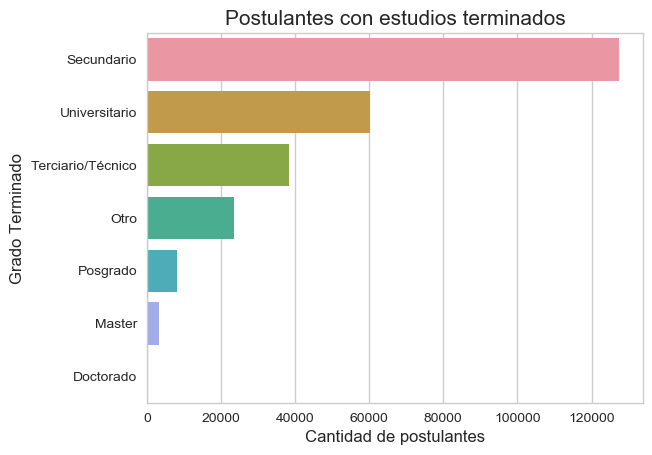

In [7]:
postulantes_estudios_terminados = postulantes_educacion[postulantes_educacion['Estado formacion'] == 'Graduado']['Formacion'].value_counts()
g = sns.barplot(x=postulantes_estudios_terminados.values, y=postulantes_estudios_terminados.index, orient='h')
g.set_title("Postulantes con estudios terminados", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=12)
g.set_ylabel("Grado Terminado", fontsize=12)

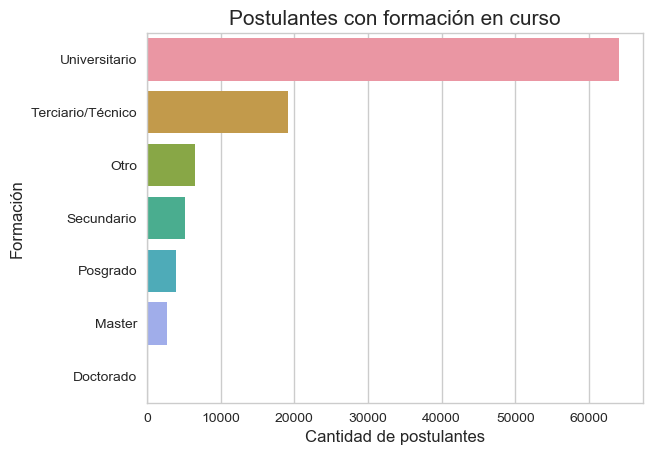

In [8]:
postulantes_estudios_en_curso = postulantes_educacion[postulantes_educacion['Estado formacion'] == 'En Curso']['Formacion'].value_counts()
g = sns.barplot(x=postulantes_estudios_en_curso.values, y=postulantes_estudios_en_curso.index, orient='h')
g.set_title("Postulantes con formación en curso", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=12)
g.set_ylabel("Formación", fontsize=12)

In [9]:
for_heatmap = postulantes_educacion.pivot_table(index='Formacion', columns='Estado formacion', values='Id postulante', aggfunc='count')
print(for_heatmap)

Estado formacion   Abandonado  En Curso  Graduado
Formacion                                        
Doctorado                  25       159       166
Master                    263      2668      3208
Otro                     1166      6575     23420
Posgrado                  472      3903      8224
Secundario               4225      5199    127491
Terciario/Técnico        7605     19203     38468
Universitario           20626     64108     60335


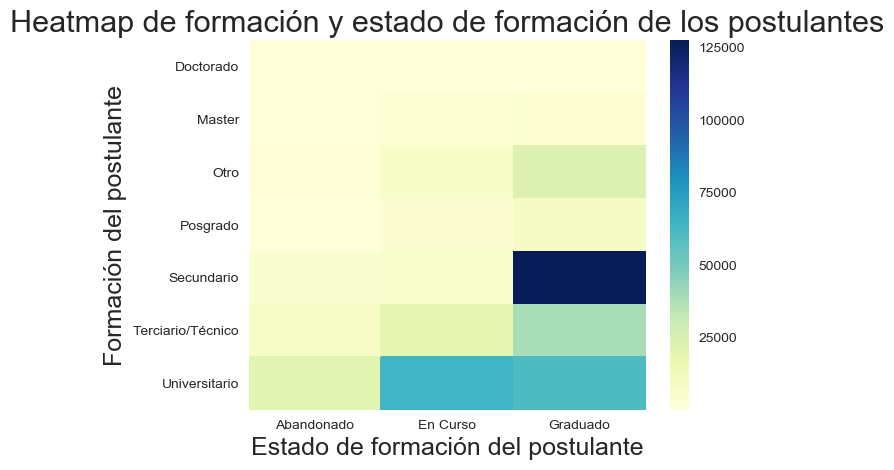

In [10]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de formación y estado de formación de los postulantes", fontsize=22)
g.set_xlabel("Estado de formación del postulante",fontsize=18)
g.set_ylabel("Formación del postulante", fontsize=18)

Tener en cuenta que estas visualizaciones muestran solamente tendencias un poco cuestionables... porque el data set no esta bien estructurado. Hay id duplicados y parece que lo que representa este data set son las actualizaciones de los datos de formacion de cada postulante. Inclusive hay algunos casos en donde para *un mismo id* tenemos las siguientes 3 observaciones:

- Universitario En Curso
- Universitario Terminado
- Universitario Abandonado

Se podría buscar el máximo nivel educativo por postulante y visualizar esos datos del mismo modo que arriba, pero pienso que no tiene mucho sentido puesto que tendría más sentido tener una entidad (dataset) que sea: formacion de posutlante en postulaciones (tener el estado del nivel educativo de cada postulante por cada postulacion realizada) y obtener ese heatmap con los datos de cada postulacion. 

# # Explorando el dataset postulantes_genero_y_edad

In [15]:
pd.read_csv('data/FiubaDesde15Abril/fiuba_2_postulantes_genero_y_edad.csv').head()

,idpostulante,fechanacimiento,sexo
0,6MM,1985-01-01,MASC
1,ZX1,NaN,NO_DECLARA
2,YZP,1961-05-01,MASC
3,ebE,1952-07-07,MASC
4,N1x,NaN,NO_DECLARA


In [17]:
def get_year_of_birth(postulantes_genero_edad):
    return (pd.to_datetime
            (postulantes_genero_edad['fechanacimiento'], errors='coerce', format='%Y-%m-%d')
            .dt.year)

def get_age(yearOfBirth):
    return 2018 - yearOfBirth
    
def get_age_range(yearOfBirth):
    age = get_age(yearOfBirth)
    if(age<25): return 'Entre 18 y 24'
    if(age<30): return 'Entre 25 y 30'
    if(age<35): return 'Entre 30 y 35'
    if(age<40): return 'Entre 35 y 40'
    if(age<45): return 'Entre 40 y 45'
    if(age<50): return 'Entre 45 y 50'
    return 'Mayor de 50'

def get_order_for_age_range():
    return ['Entre 18 y 24', 'Entre 25 y 30','Entre 30 y 35','Entre 35 y 40','Entre 40 y 45','Entre 45 y 50', 'Mayor de 50']

def get_postulantes_genero_edad():
    postulantes_genero_edad = pd.read_csv('data/FiubaDesde15Abril/fiuba_2_postulantes_genero_y_edad.csv')
    postulantes_genero_edad['año_nacimiento_postulante']=get_year_of_birth(postulantes_genero_edad)
    postulantes_genero_edad['edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age, na_action=None)
    postulantes_genero_edad['rango_edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age_range, na_action=None)
    columns_rename = {'idpostulante': 'id_postulante', 'fechanacimiento': 'fecha_nacimiento_postulante', 'sexo': 'genero_postulante'}
    postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
    postulantes_genero_edad = postulantes_genero_edad[['id_postulante', 'genero_postulante', 'fecha_nacimiento_postulante', 'edad_postulante', 'rango_edad_postulante']]
    postulantes_genero_edad['genero_postulante'] = postulantes_genero_edad['genero_postulante'].map({'FEM': 'Femenino', 'MASC': 'Masculino', 'NO_DECLARA': 'No declara'})
    #Nos interesan los que indicaron el genero masculino o femenino para nuestro análisis
    return postulantes_genero_edad[postulantes_genero_edad['genero_postulante']!='No declara']


postulantes_genero_edad = get_postulantes_genero_edad()
postulantes_genero_edad.head(10)


,id_postulante,genero_postulante,fecha_nacimiento_postulante,edad_postulante,rango_edad_postulante
0,6MM,Masculino,1985-01-01,33.0,Entre 30 y 35
2,YZP,Masculino,1961-05-01,57.0,Mayor de 50
3,ebE,Masculino,1952-07-07,66.0,Mayor de 50
7,NAjM,Femenino,1962-06-09,56.0,Mayor de 50
9,ZjlZ,Masculino,1970-01-25,48.0,Entre 45 y 50
10,aEWON,Femenino,1967-06-16,51.0,Mayor de 50
11,aEW8J,Femenino,1965-05-19,53.0,Mayor de 50
12,8QGRj,Femenino,1980-09-07,38.0,Entre 35 y 40
13,EDOlOJ,Masculino,1974-10-11,44.0,Entre 40 y 45
14,6kBZLl,Masculino,1978-10-16,40.0,Entre 40 y 45


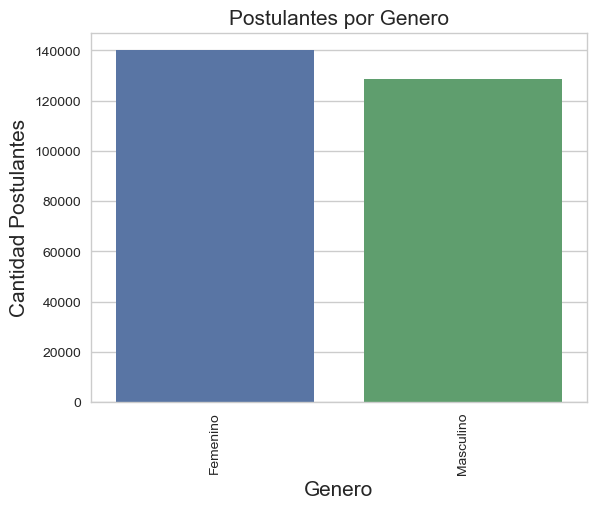

In [21]:
g = sns.countplot(x='genero_postulante', data=postulantes_genero_edad, order=postulantes_genero_edad['genero_postulante'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Genero", fontsize=15)
g.set_ylabel("Cantidad Postulantes", fontsize=15)
g.set_title("Postulantes por Genero", fontsize=15)

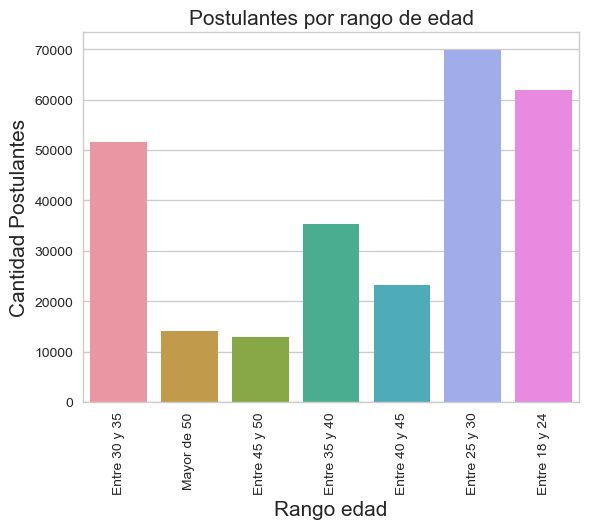

In [26]:

g = sns.countplot(x='rango_edad_postulante', data=postulantes_genero_edad, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Rango edad", fontsize=15)
g.set_ylabel("Cantidad Postulantes", fontsize=15)
g.set_title("Postulantes por rango de edad", fontsize=15)

In [51]:
#Para chusmear los rangos de edad y el sexo
pd.crosstab(postulantes_genero_edad['Rango edad'], postulantes_genero_edad['Sexo'])

Sexo,FEM,MASC,NO_DECLARA
Rango edad,,,
Entre 18 y 25,36569,26643,148
Entre 26 y 30,29094,24651,99
Entre 31 y 35,16469,17374,75
Entre 36 y 40,9692,11378,50
Entre 41 y 45,5062,6496,25
Entre 46 y 50,2671,3643,24
Mayor de 50,2424,4153,4147
Menor de 18,0,1,0


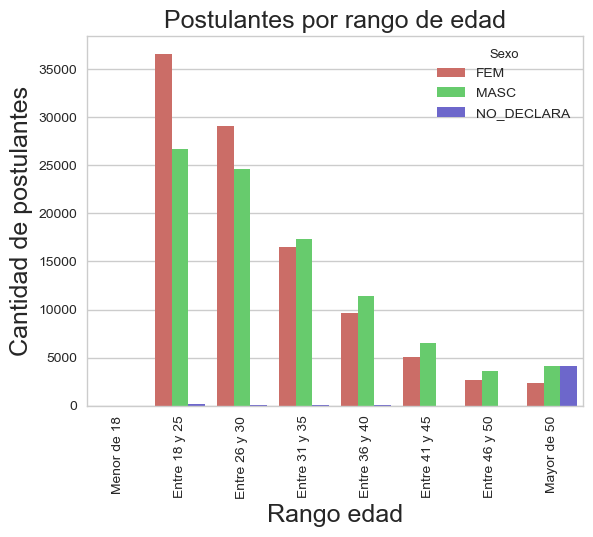

In [63]:
g = sns.countplot(x="Rango edad", hue="Sexo", data=postulantes_genero_edad, order=order_x, palette="hls")
g.set_title("Postulantes por rango de edad", fontsize=18)
g.set_xlabel("Rango edad", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

Las únicas observaciones son sobre el campo *fecha de nacimiento* que tiene los siguientes problemas no resueltos
- Hay diferentes formatos (y-m-d, d-m-y). Como esta ahora se puso valores nulos en el formato minoritario. Se tendrian que rescatar esos valores
- Hay dos outliers (uno que nacio en el 1700 y otro que es menor de 18 años)

# # Explorando el dataset vistas

In [27]:
vistas = pd.read_csv('data/FiubaDesde15Abril/fiuba_3_vistas.csv')

#print('Cantidad Registros, Cantidad atributos')
vistas.shape

#print('Categorias de valores educativos y cantidad de registros')
vistas['idAviso'].value_counts()

#print('Valores null')
vistas.isnull().sum()
#vistas.isnull().any()

vistas.info()
columns_rename = {'idpostulante': 'Id postulante', 'idAviso': 'Id aviso', 'timestamp': 'Timestamp'}
vistas = vistas.rename(columns=columns_rename)
vistas.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11648230 entries, 0 to 11648229
Data columns (total 3 columns):
idAviso         int64
timestamp       object
idpostulante    object
dtypes: int64(1), object(2)
memory usage: 266.6+ MB


,Id aviso,Timestamp,Id postulante
11648220,1806166,2018-04-16T10:07:27.189-0400,1lKOKB
11648221,1112460370,2018-04-16T10:07:27.083-0400,1YzEGO
11648222,1806474,2018-04-16T10:07:27.221-0400,NO3BD
11648223,1804929,2018-04-16T10:07:27.238-0400,DA2q2l
11648224,1112457238,2018-04-16T10:07:27.284-0400,Yj5Q0lP
11648225,1805754,2018-04-16T10:07:27.323-0400,0xz2q
11648226,1805788,2018-04-16T10:07:27.602-0400,6k6pkv
11648227,1805640,2018-04-16T10:07:27.630-0400,x5Gzb
11648228,1112442707,2018-04-16T10:07:27.337-0400,BmV5wza
11648229,1805411,2018-04-16T10:07:27.671-0400,4jxNz


In [28]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}

def get_day_moment(timestamp):
    hour = timestamp.hour
    if(hour>=7 and hour<=11): return 'Mañana'
    if(hour>11 and hour<16): return 'Mediodia'
    if(hour>=16 and hour<20): return 'Tarde'
    if((hour>=20 and hour<=23) or (hour>=0 and hour<4)): return 'Noche'
    return 'Madrugada'

vistas['Timestamp']=pd.to_datetime(vistas['Timestamp'])
vistas['Mes'] = vistas['Timestamp'].dt.month
vistas['Año'] = vistas['Timestamp'].dt.year
vistas['Franja horaria'] = vistas['Timestamp'].map(get_day_moment)
vistas['Dia semana'] = (vistas['Timestamp'].dt.weekday_name).map(lambda x: dayTranslation[x])
vistas['Dia'] = vistas['Timestamp'].dt.day
vistas['Timestamp'].min()
vistas['Timestamp'].max()

Timestamp('2018-05-01 03:59:59.976000')

In [76]:
vistas['Año'].value_counts()

2018    961897
Name: Año, dtype: int64

In [77]:
vistas['Mes'].value_counts()

2    921074
3     40823
Name: Mes, dtype: int64

In [111]:
vistas['Dia semana'].value_counts() 

Martes       232145
Lunes        227957
Miercoles    227160
Sabado        95930
Domingo       90646
Viernes       47236
Jueves        40823
Name: Dia semana, dtype: int64

In [112]:
vistas['Dia'].value_counts() 

27    232145
26    227957
28    227160
24     95930
25     90646
23     47236
1      40823
Name: Dia, dtype: int64

In [94]:
vistas['Franja horaria'].value_counts()

Noche        382209
Mediodia     241090
Tarde        226901
Mañana        69995
Madrugada     41702
Name: Franja horaria, dtype: int64

In [118]:
pd.crosstab(vistas['Dia'], vistas['Franja horaria'])

Franja horaria,Madrugada,Mañana,Mediodia,Noche,Tarde
Dia,,,,,
1,4737,0,0,36086,0
23,0,0,0,32947,14289
24,3940,8609,26628,35980,20773
25,4351,5847,24531,34903,21014
26,8391,17459,66540,76344,59223
27,9832,17978,62326,84590,57419
28,10451,20102,61065,81359,54183


Son las vistas que realizaron postulantes en una semana: 23 Febrero al 1 Marzo inclusive

In [138]:
order_x = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
order_y = ['Madrugada', 'Noche', 'Tarde', 'Mediodia', 'Mañana']
vistas['Franja horaria'] = pd.Categorical(vistas['Franja horaria'], order_y)
vistas['Dia semana'] = pd.Categorical(vistas['Dia semana'], order_x)
vistas.sort_values(['Dia semana', 'Franja horaria'])
for_heatmap = vistas.pivot_table(index='Franja horaria', columns='Dia semana', values='Id aviso', aggfunc='count')
#for_heatmap.sortlevel(level=0, inplace=True)
for_heatmap

Dia semana,Domingo,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
Franja horaria,,,,,,,
Madrugada,4351.0,8391.0,9832.0,10451.0,4737.0,NaN,3940.0
Noche,34903.0,76344.0,84590.0,81359.0,36086.0,32947.0,35980.0
Tarde,21014.0,59223.0,57419.0,54183.0,NaN,14289.0,20773.0
Mediodia,24531.0,66540.0,62326.0,61065.0,NaN,NaN,26628.0
Mañana,5847.0,17459.0,17978.0,20102.0,NaN,NaN,8609.0


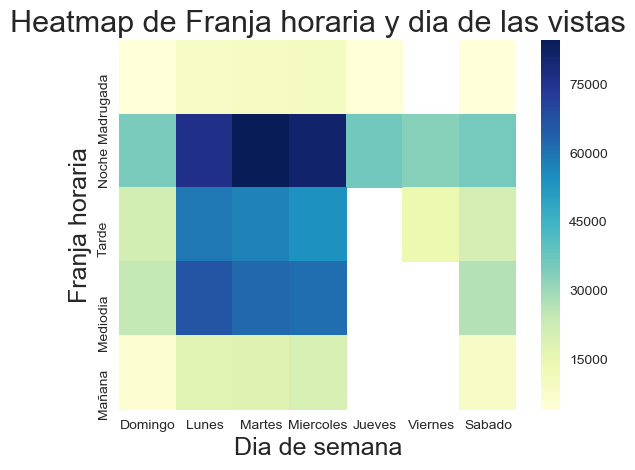

In [140]:

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de Franja horaria y dia de las vistas", fontsize=22)
g.set_xlabel("Dia de semana",fontsize=18)
g.set_ylabel("Franja horaria", fontsize=18)

# # Explorando el dataset postulaciones

In [5]:
postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')

#print('Cantidad Registros, Cantidad atributos')
postulaciones.shape

#print('Categorias de valores educativos y cantidad de registros')
#postulaciones['idAviso'].value_counts()

#print('Valores null')
#postulaciones.isnull().sum()
#postulaciones.isnull().any()

#postulaciones.info()
#columns_rename = {'idpostulante': 'Id postulante', 'idAviso': 'Id aviso', 'fechapostulacion': 'Fecha postulacion'}
#postulaciones = postulaciones.rename(columns=columns_rename)
postulaciones.tail(10)


,idaviso,idpostulante,fechapostulacion
3401613,1112334662,1QPMbX3,2018-02-28 23:56:53
3401614,1112354320,1QPMbX3,2018-02-28 23:57:22
3401615,1112360579,1QPMbX3,2018-02-28 23:58:32
3401616,1112359520,1QPMbX3,2018-02-28 23:59:34
3401617,1112344822,0zPa0eq,2018-02-28 23:49:46
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10


In [158]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}

def get_day_moment(timestamp):
    hour = timestamp.hour
    if(hour>=7 and hour<=11): return 'Mañana'
    if(hour>11 and hour<16): return 'Mediodia'
    if(hour>=16 and hour<20): return 'Tarde'
    if((hour>=20 and hour<=23) or (hour>=0 and hour<4)): return 'Noche'
    return 'Madrugada'

postulaciones['Fecha postulacion']=pd.to_datetime(postulaciones['Fecha postulacion'])
postulaciones['Mes'] = postulaciones['Fecha postulacion'].dt.month
postulaciones['Año'] = postulaciones['Fecha postulacion'].dt.year
postulaciones['Franja horaria'] = postulaciones['Fecha postulacion'].map(get_day_moment)
postulaciones['Dia semana'] = (postulaciones['Fecha postulacion'].dt.weekday_name).map(lambda x: dayTranslation[x])
postulaciones['Dia'] = postulaciones['Fecha postulacion'].dt.day
postulaciones['Fecha postulacion'].min()
postulaciones['Fecha postulacion'].max()

Timestamp('2018-02-28 23:59:55')

In [153]:
postulaciones['Año'].value_counts()

2018    3401623
Name: Año, dtype: int64

In [154]:
postulaciones['Mes'].value_counts()

2    2125425
1    1276198
Name: Mes, dtype: int64

In [156]:
postulaciones['Franja horaria'].value_counts()

Mañana       1170186
Mediodia      853558
Tarde         656442
Noche         546111
Madrugada     175326
Name: Franja horaria, dtype: int64

In [157]:
postulaciones['Dia semana'].value_counts()

Miercoles    677836
Lunes        668310
Martes       658428
Jueves       506163
Viernes      446698
Domingo      226857
Sabado       217331
Name: Dia semana, dtype: int64

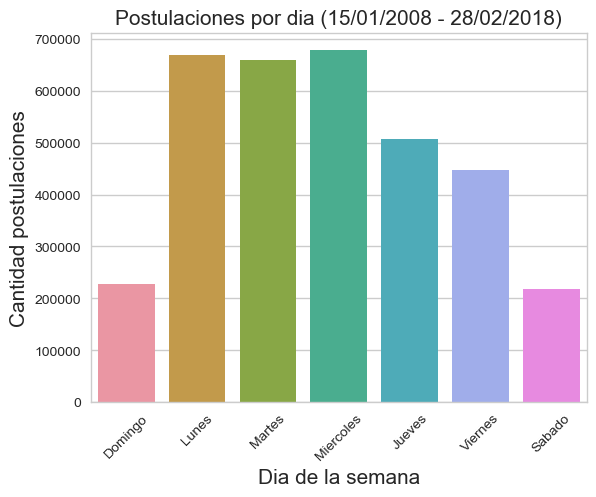

In [161]:
order_x = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
g = sns.countplot(x='Dia semana', data=postulaciones, order=order_x, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Dia de la semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por dia (15/01/2008 - 28/02/2018)", fontsize=15)

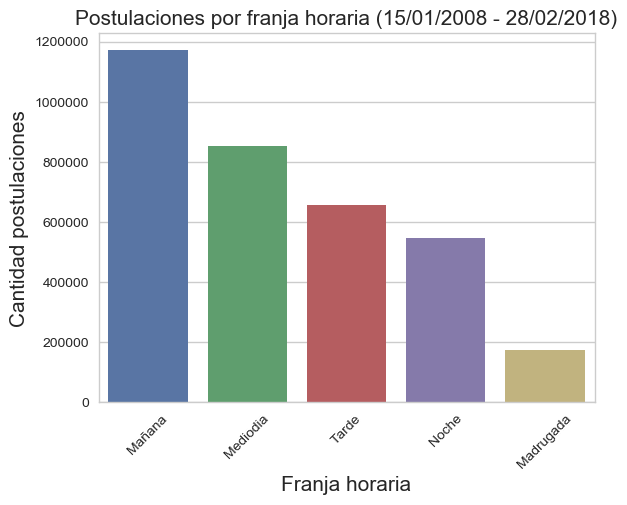

In [165]:
order_x = ['Mañana', 'Mediodia', 'Tarde', 'Noche', 'Madrugada']
g = sns.countplot(x='Franja horaria', data=postulaciones, order=order_x, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Franja horaria", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por franja horaria (15/01/2008 - 28/02/2018)", fontsize=15)

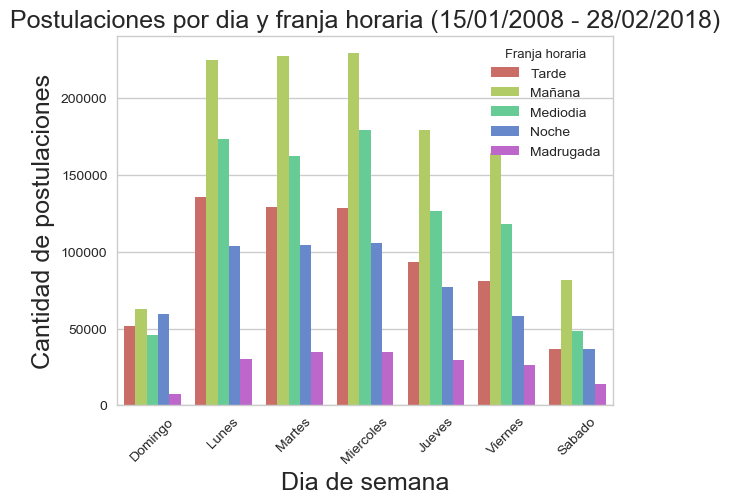

In [168]:
order_x = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
g = sns.countplot(x="Dia semana", hue="Franja horaria", data=postulaciones, order=order_x, palette="hls")
g.set_title("Postulaciones por dia y franja horaria (15/01/2008 - 28/02/2018)", fontsize=18)
g.set_xlabel("Dia de semana", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

# Explorando el dataset Avisos Online

In [8]:
avisosOnline = pd.read_csv('data/fiuba_5_avisos_online.csv')

#print('Cantidad Registros, Cantidad atributos')
print(avisosOnline.shape)

#print('Categorias de valores educativos y cantidad de registros')
#avisosOnline['idAviso'].value_counts()

#print('Valores null')
#avisosOnline.isnull().sum()
#avisosOnline.isnull().any()

#avisosOnline.info()
avisosOnline.tail(10)

(5028, 1)


,idaviso
5018,1112387914
5019,1112388054
5020,1112387925
5021,1112386257
5022,1112387944
5023,1112387966
5024,1112383275
5025,1112388199
5026,1112388376
5027,1112387833


In [9]:
avisosDetalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')

#print('Cantidad Registros, Cantidad atributos')
print(avisosDetalle.shape)

#print('Categorias de valores educativos y cantidad de registros')
#avisosDetalle['idAviso'].value_counts()

#print('Valores null')
#avisosDetalle.isnull().sum()
#avisosDetalle.isnull().any()

#avisosDetalle.info()
avisosDetalle.tail(10)

(13534, 11)


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13524,1112342193,1,Supervisor de Mantenimiento,"<p>Nuestro cliente, un importante PYME dedicad...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Mantenimiento,VF CONSULTING
13525,1112342444,1,Vendedor Telefónico / Telemarketer / Call Center,<p>UNOMOTOS Concesionaria líder en el rubro de...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS
13526,1112342462,1,Analista de Comercio Exterior(Pilar),"<p>Importante Empresa Alimenticia, del Parque ...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Compras Internacionales/Importación,BAYTON
13527,1112342487,1,Técnico para operación y detección en equipos ...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Construcción,CIMA S.A.
13528,1112342500,1,RESPONSABLE DE DISEÑO Y DESARROLLO,"<p style=""""><span style="""">Para Importante Emp...",Capital Federal,NaN,Panamericana 35.7,Full-time,Senior / Semi-Senior,Diseño,Cometto SA
13529,1112342505,1,Vendedor de Salon -- UNOMOTOS,<p>UNOMOTOS Concesionaria líder en el rubro de...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS
13530,1112342513,1,OPERADOR DE ENSAYOS NO DESTRUCTIVOS,<p><strong>RECONOCIDA EMPRESA DE MONTAJES INDU...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ingeniería Oficina Técnica / Proyecto,Grupo Consultor
13531,1112342456,1,Back officer Junior de Fondos Comunes de Inver...,"<p>BNP Paribas Investment Partners, importante...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Contabilidad,BNP PARIBAS ARGENTINA INVESTMENT PARTNERS S A
13532,1112342496,1,Asistente Administrativo,"<p>Somos un joven grupo gastronómico, que se e...",Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / Dirección,Administración,Cerveteca Odin Srl
13533,1112342432,1,Ingeniero para coordinación de obras de canali...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Construcción,CIMA S.A.
